# Plots de distribuições

Vamos discutir alguns gráficos que nos permitem visualizar a distribuição de um conjunto de dados. Esses plots são:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot
SEABORN
Gerar graficos estatisticos + agradavel que o matplotlib

___
## Imports

In [2]:
import seaborn as sns
%matplotlib inline

## Dados
Seaborn vem com conjuntos de dados embutidos.

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## distplot

O distplot mostra a distribuição de um conjunto de observações de uma variável.

/home/anahelena/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

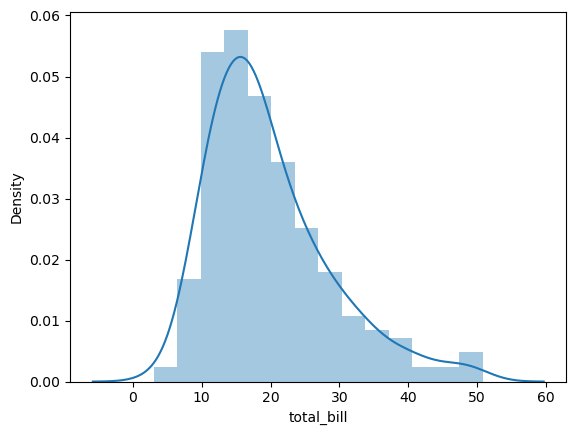

In [9]:
sns.distplot(tips['total_bill'])#passa a coluna de um dataframe podia ser qualquer outro dado (lista)

/home/anahelena/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)

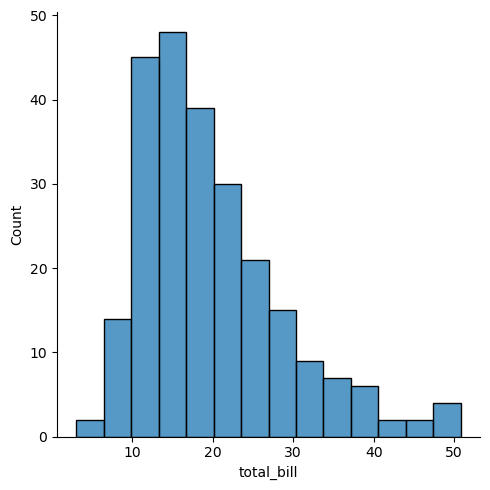

In [10]:
sns.displot(tips['total_bill'])

Para remover a camada kde e apenas usar o histograma:

<AxesSubplot:xlabel='total_bill'>

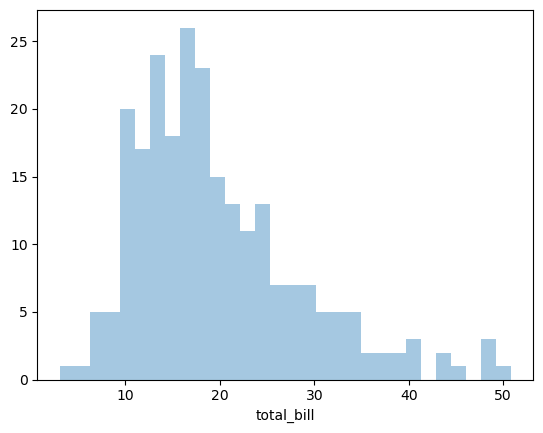

In [12]:
sns.distplot(tips['total_bill'],kde=False,bins=30)# kde linha e bins é largura da barra

<AxesSubplot:xlabel='total_bill'>

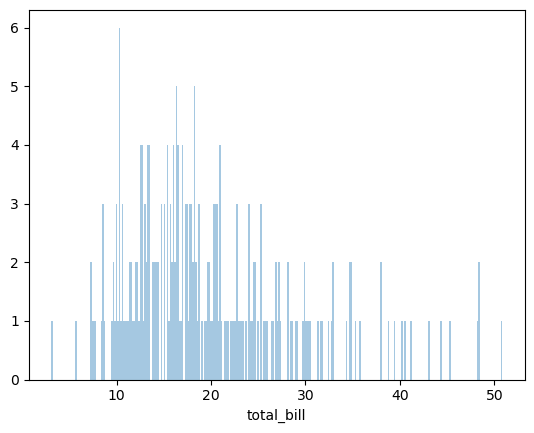

In [13]:
sns.distplot(tips['total_bill'],kde=False,bins=300)# kde linha e bins é largura da barra

## jointplot

jointplot() permite combinar basicamente dois distplots() para dados bivariados. Podemos visualizar os dados das seguintes formas (usando o **kind**):
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

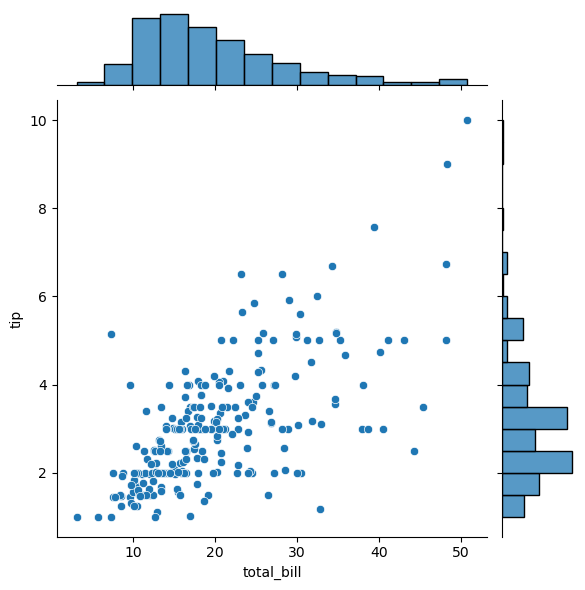

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips)

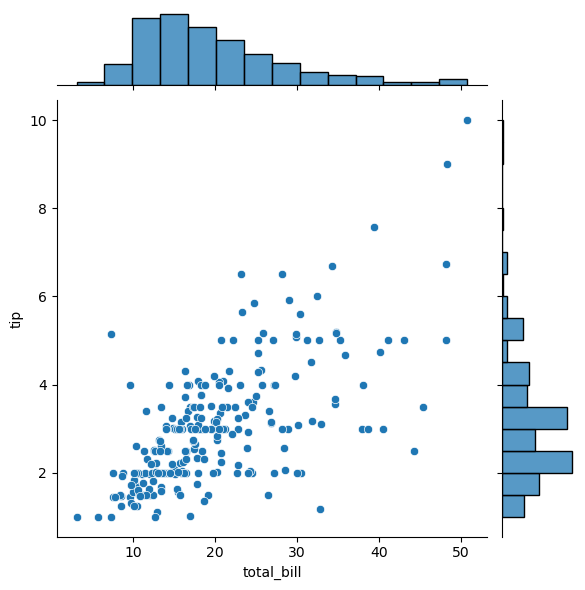

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

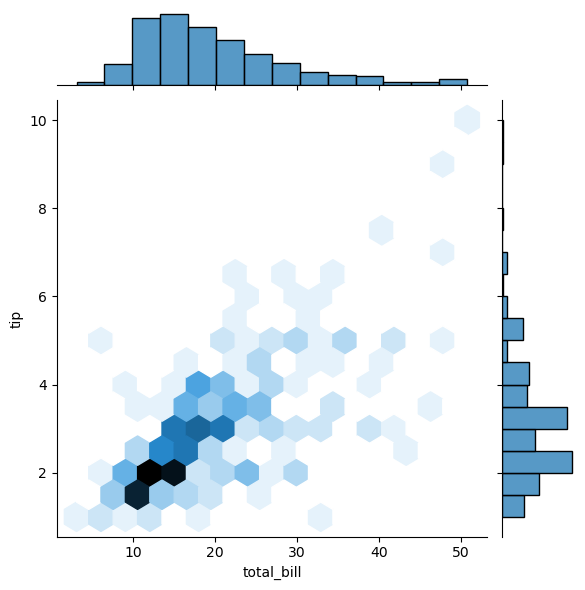

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

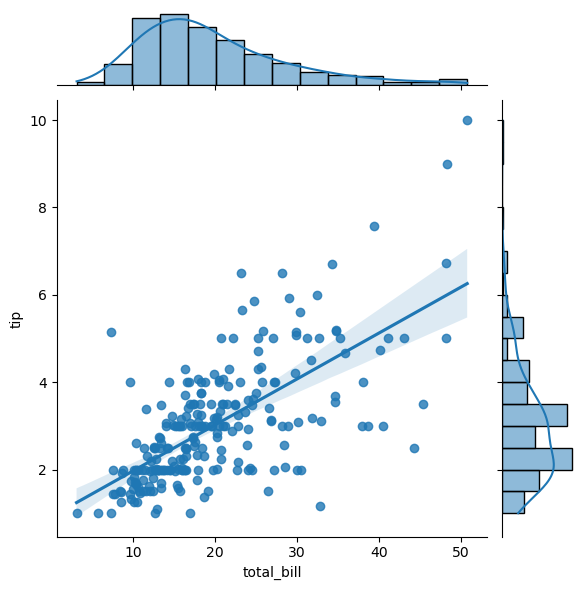

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')#regrassão

## pairplot

pairplot irá traçar distribuições entre pares em todo o DataFrame (para as colunas numéricas) e suporta um argumento de matiz de cor (para colunas categóricas).

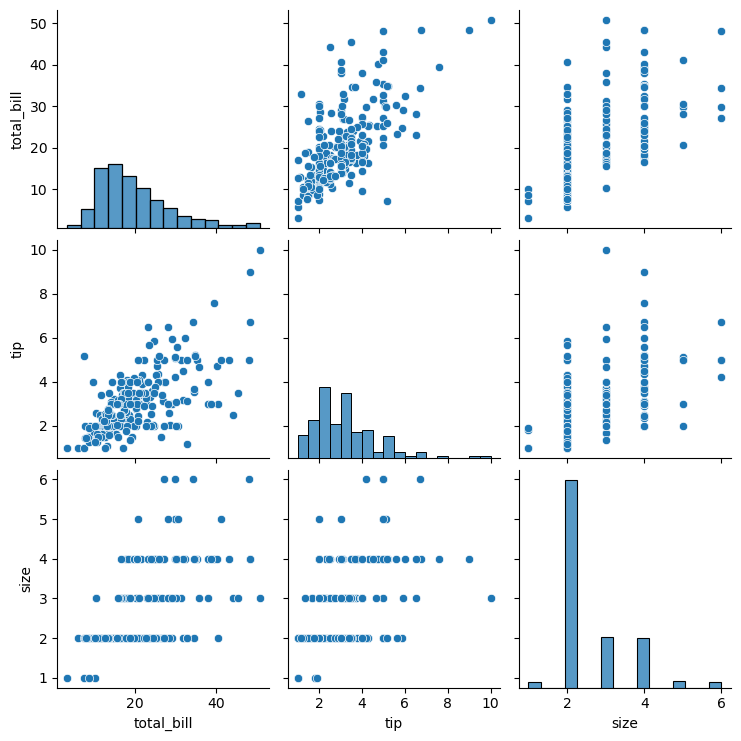

In [18]:
sns.pairplot(tips)#todas as variaveis numericas e suas relações

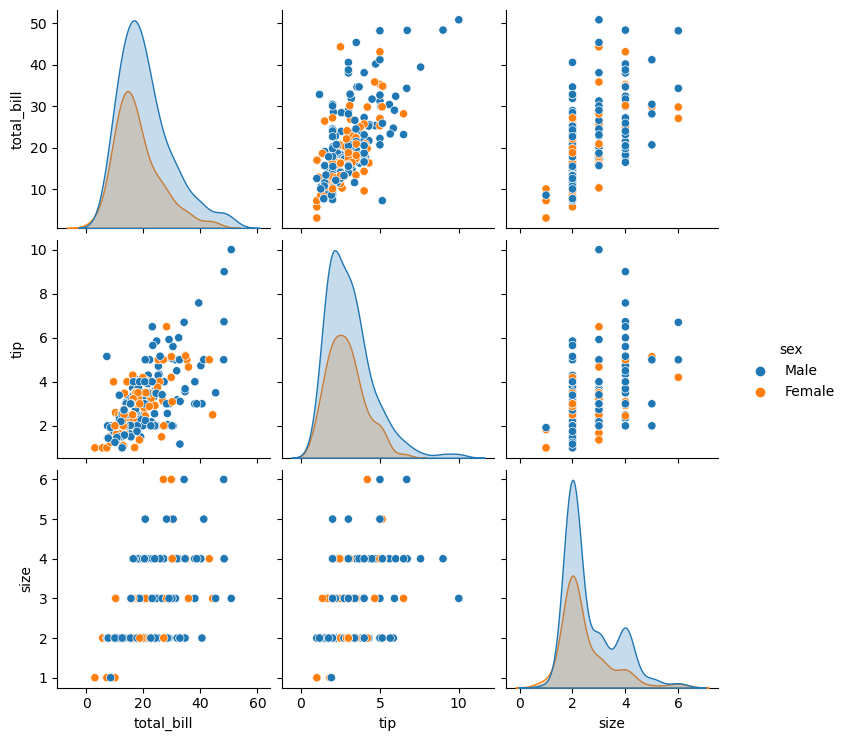

In [20]:
sns.pairplot(tips,hue='sex')#coluna categorica sexo (não numerica)

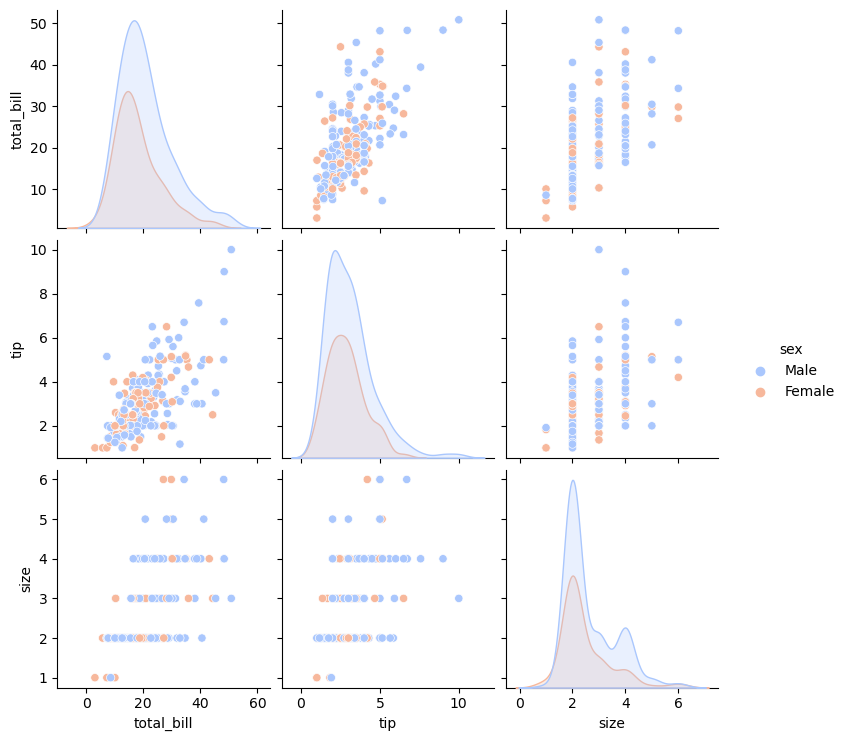

In [19]:
sns.pairplot(tips,hue='sex',palette='coolwarm')#coluna categorica sexo (não numerica)

## rugplot

rugplots possuem um conceito muito simples, eles apenas desenham uma marca de traço para cada ponto em uma distribuição univariada. Eles são o bloco de construção de um KDE:

<AxesSubplot:xlabel='total_bill'>

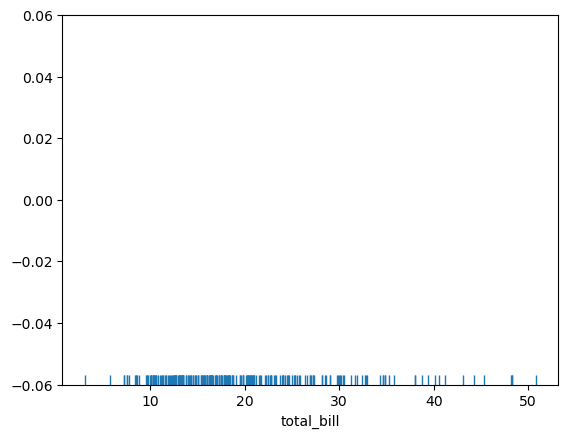

In [21]:
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

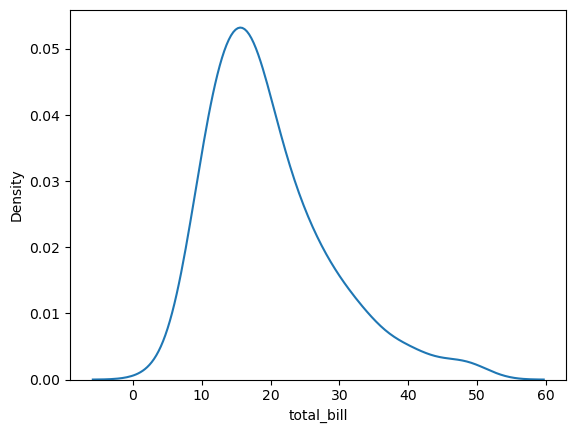

In [22]:
sns.kdeplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

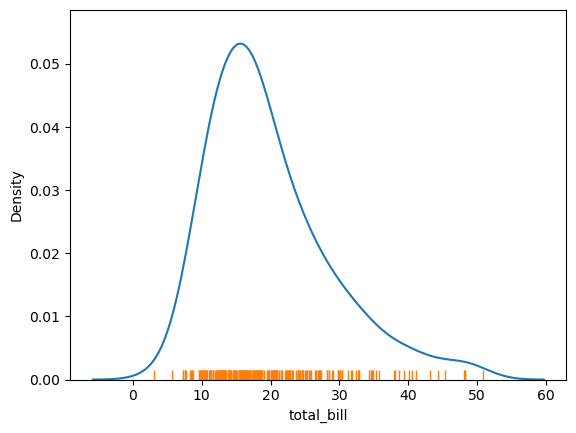

In [23]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots são [Plots de estimativa de densidade kernel](http://en.wikipedia.org/wiki/Kernel_density_estimation#Pratical_estimation_of_the_bandwidth). Esses plots KDE substituem cada observação com uma distribuição Gaussiana (Normal) centrada em torno desse valor. Por exemplo:

(0.0, 1.0)

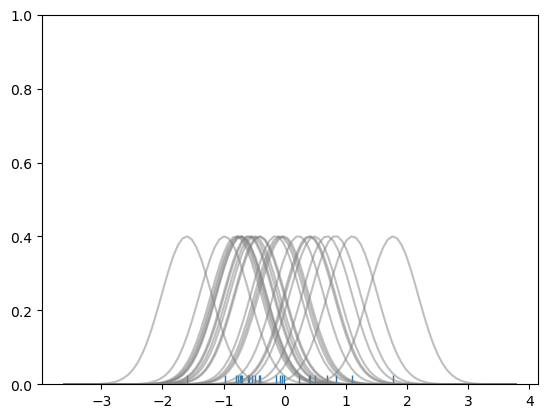

In [24]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cria o dataset
dataset = np.random.randn(25)

# Cria outro rugplot
sns.rugplot(dataset);

# Configure o eixo dos x para o gráfico
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 pontos igualmente espaçados de x_min para x_max
x_axis = np.linspace(x_min,x_max,100)

# Configure a largura de banda. Para obter informações sobre isso:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Crie uma lista de kernel vazia
kernel_list = []

# Traça cada função de base
for data_point in dataset:
    
    # Crie um kernel para cada ponto e acrescente à lista
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Ajusta a escala para plotar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

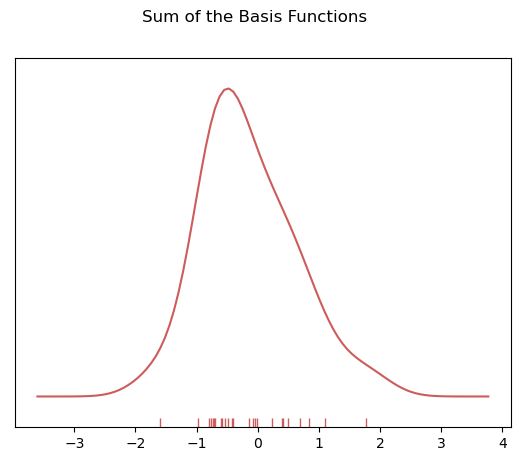

In [25]:
# Para obter o gráfico do kde podemos somar essas funções de base.

# Traça a soma da função de base
sum_of_kde = np.sum(kernel_list,axis=0)

# Plota a figura
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adiciona o rugplot inicial
sns.rugplot(dataset,c = 'indianred')

# Livrar-se das marcas de "y-tick"
plt.yticks([])

# Define o título
plt.suptitle("Sum of the Basis Functions")

Então, com nosso DataFrame tips:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

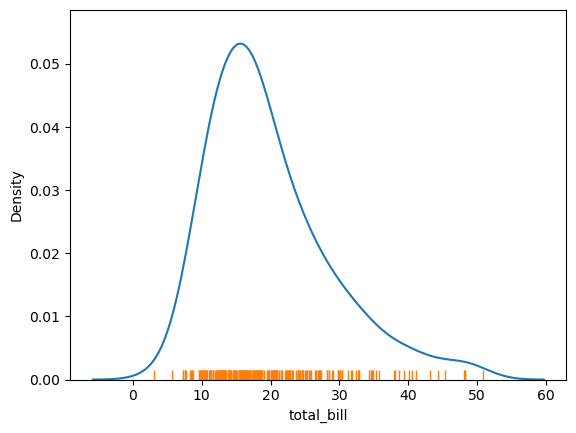

In [26]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

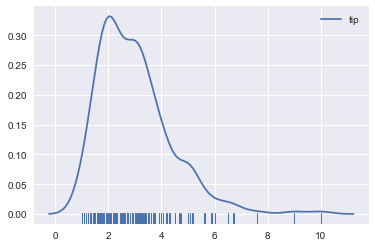

In [15]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])